# DATA PREPARATION AND PREPROCESSING

In [1]:
#importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
#Loading the dataset
df = pd.read_csv("Covid Data.csv")

In [3]:
#viewing the top 10 rows of our dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
#viewing the top 10 rows of our dataset
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
#Checking duplication percentage
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [6]:
#print the datatype in each column
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [7]:
#count the number of missing or null values in each column
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [8]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [9]:
#Checking the real status of the missing values
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

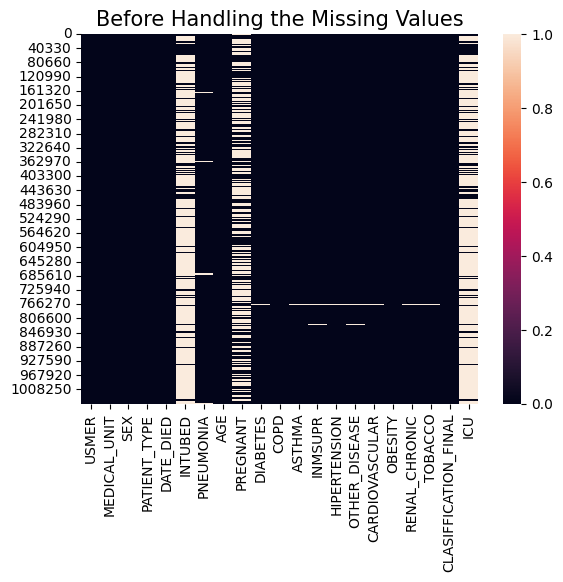

In [10]:
#create a heatmap that visually represents the presence of null values
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [11]:
#creating a new column in the DataFrame df named DEAD
df['DATE_DIED'][df[
    'DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [12]:
#count the frequency of each unique value in the DEAD column of the DataFrame df
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [13]:
#count the frequency of each unique value in the DEAD column of the DataFrame df
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [14]:
# Replace occurrences of a specific value ('9999-99-99') in the 'DATE_DIED' column of the DataFrame df with np.nan
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [48]:
#Check the modified dataframe
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [16]:
#count the number of missing or null values in the 'DATE_DIED' column
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])

In [17]:
#Check the modified dataframe
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [47]:
#count the number of missing or null values in the 'DATE_DIED' column
df['DATE_DIED'].isnull().sum()

971633

In [19]:
#summary of the DataFrame df
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


In [20]:
#count the number of entries in the 'AGE' column in the dataFrame df where the age values are greater than 110
df['AGE'][df['AGE']> 110].value_counts().sum()

22

In [21]:
#Count the values
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [22]:
#eturns the tuple
df.SEX.shape

(1048575,)

In [23]:
#include only those rows where the value in the 'SEX' column is 1
df[(df['SEX'] ==1)].shape

(525064, 22)

In [24]:
#include only those rows where the 'SEX' column has a value of 1, and then selects the 'PREGNANT'
df[(df['SEX'] == 1)]['PREGNANT']

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [25]:
#Counts the total number of pregant women
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [26]:
#total females
513179+8131+3754

525064

In [27]:
# Males count in 'PREGNANT' column
df[(df['SEX'] == 2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [28]:
#count the values in the 'PREGNANT' column where 'SEX' is male
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [29]:
#Total count of values in the pregnant column
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [30]:
#replace all the corresponding values to the male section (97) with (2);
df['PREGNANT'].replace (97, 2, inplace = True)

In [31]:
#Count the modified values
df['PREGNANT'].value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

In [32]:
# count the frequency of each unique value in the 'ICU' column 
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [33]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print(f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print(df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 99 the shape will be: 

(7488, 22) 
 




In [34]:
#Replace all occurrences of the value 97 with 2 in the relevant column, as it is clear that patients who were not hospitalized (indicated by 97) could not have been admitted to the ICU.
df['ICU'].replace (97, 2, inplace = True)
df['ICU'].replace (97, 2, inplace = True)

In [35]:
#Count the values in the modified df
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

In [36]:
#count the frequency of each value in the 'INTUBED' column
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [37]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 99 the shape will be: 

(7325, 22) 
 




In [38]:
#replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ventilator
df['INTUBED'].replace (97, 2, inplace = True)

In [39]:
#Count the values in the modified df
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [40]:
for i in [98, 99]:
    df.replace(i, np.nan, inplace = True)

In [41]:
#summary of the df
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [42]:
# let's undo the changes we made to the "DATE_DIED" attribute, as the values we identified as missing are actually not missing df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [43]:
#Count the null values
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

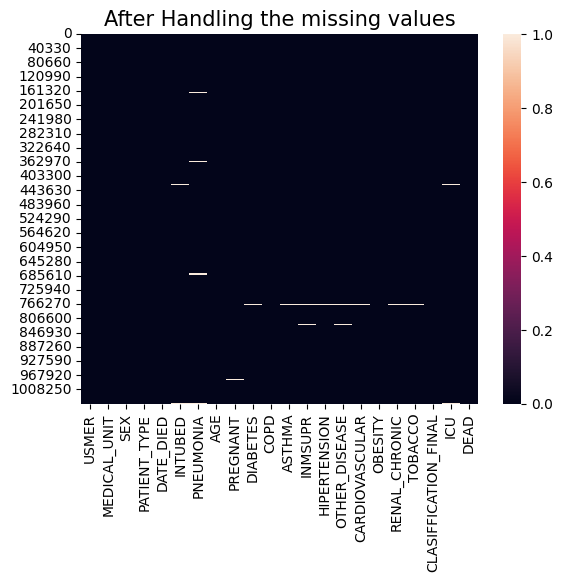

In [44]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the missing values', color = 'black', fontsize = 15)
plt.show()

In [45]:
# Create a summary of the data, with each statistic rounded to 3 decimals.
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


In [46]:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i, "->", dict(df[i].value_counts())

SyntaxError: incomplete input (3619618322.py, line 3)

In [ ]:
df

# Exploratory Data Analyis


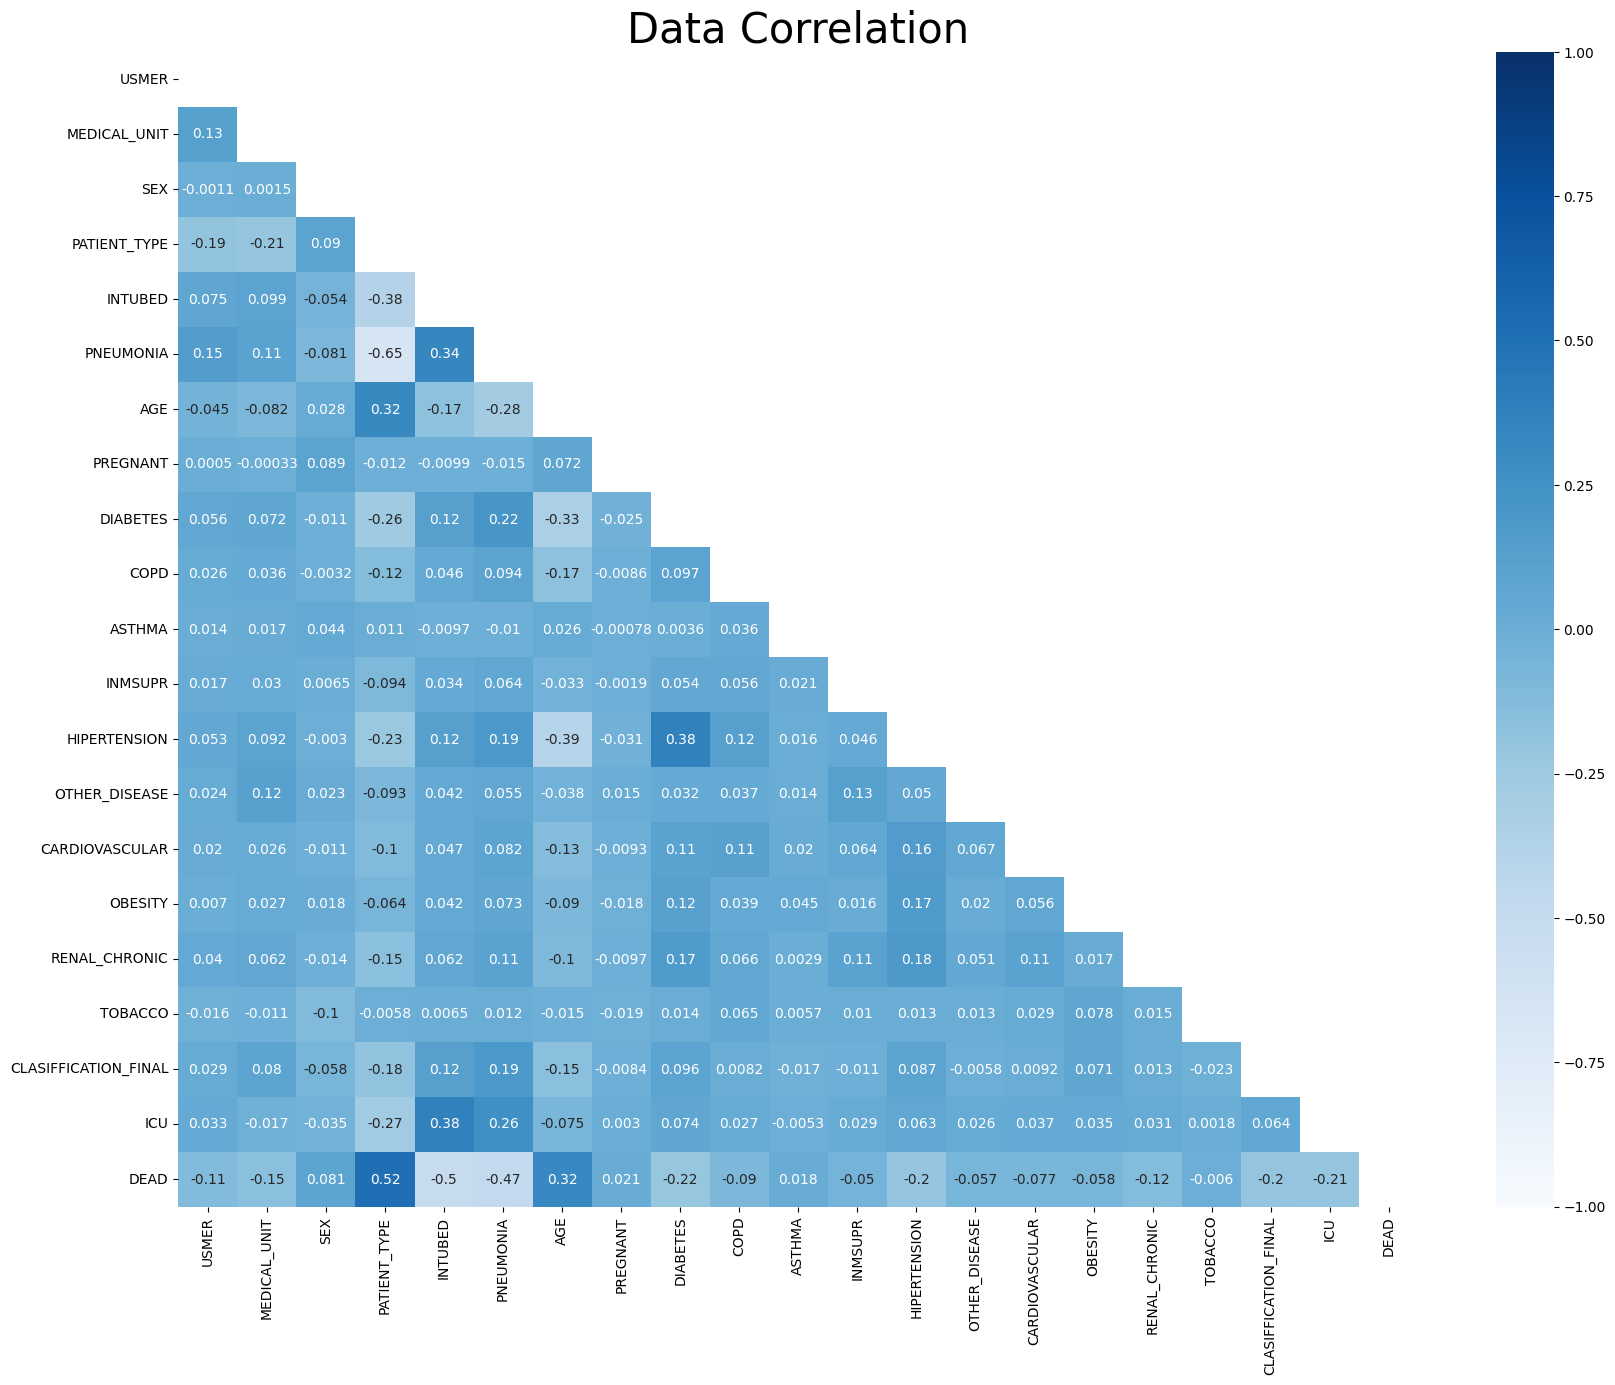

In [49]:
# Create a large heatmap (20x15 inches) showing the correlation between columns in the data, excluding 'DATE_DIED', with only the upper triangle displayed for clarity.
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [50]:
# Remove specific columns like 'USMER', 'MEDICAL_UNIT', etc., from the DataFrame 'df' to create a new DataFrame 'df_med' foc
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED','INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [51]:
# Count the total number of duplicate rows in the 'df_med' DataFrame.
df_med.duplicated(keep = False).sum()

1046563

In [52]:
# Count the number of occurrences of the value 1 in the 'DEAD' column of the 'df' DataFrame.
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

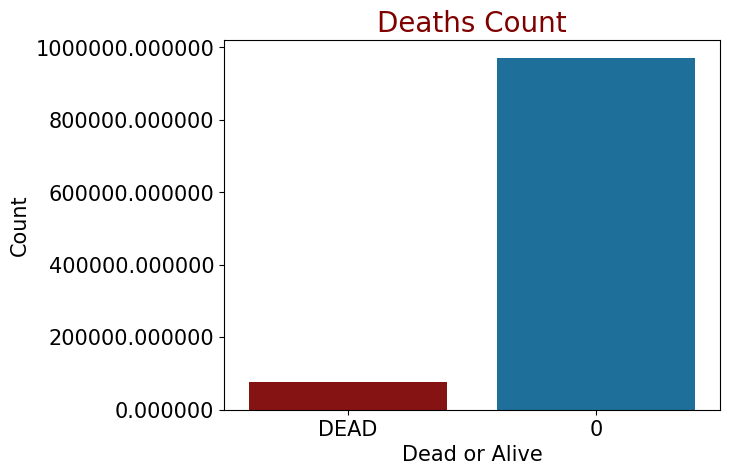

In [53]:
# Create a bar chart showing the count of 'Dead' and 'Alive' cases in the 'df' DataFrame, with customized formatting and titles.
D = df['DEAD']
D = D.replace(1, "DEAD")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000', '#0a75ad'])
plt.xlabel('Dead or Alive', fontsize=15)
plt.ylabel('Count', fontsize=15)

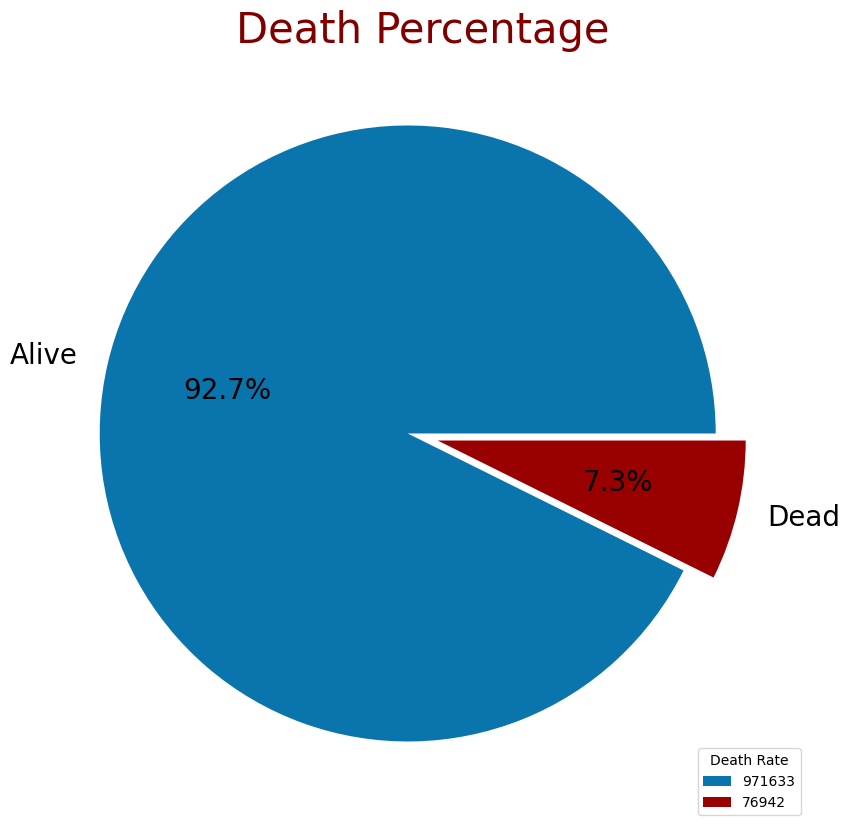

In [54]:
# Create a pie chart to display the percentage of Alive vs. Dead cases in 'df', with specific colors, labels, and an exploded view for emphasis.
labels = ['Alive', 'Dead']
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color': "black"}, colors = colors, explode=[0.05, 0.05])
plt.title('Death Percentage', color = '#800000', fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [55]:
# Create a new DataFrame 'df_dead' that contains only the rows from 'df' where the 'DEAD' column value is 1.
df_dead = df[df["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [56]:
# Count the frequency of each unique value in the 'CLASIFFICATION_FINAL' column of the 'df_dead' DataFrame.
df_dead["CLASIFFICATION_FINAL"].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

In [60]:
# Define a function to determine if a patient is a Covid-19 carrier based on a given value: 'Not a Carrier' if the value is 4 or higher, otherwise 'Carrier'.
def Covid_or_Not(val):
    if val >= 4:
        return "Patient is not a Covid 19 Carrier"
    else:
        return "Patient is a Covid 19 Carrier"

In [61]:
# Apply the 'Covid_or_Not' function to the 'CLASIFFICATION_FINAL' column of 'df_dead' to create a new column indicating Covid-19 carrier status.
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [58]:
#print the df_dead dataframe
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


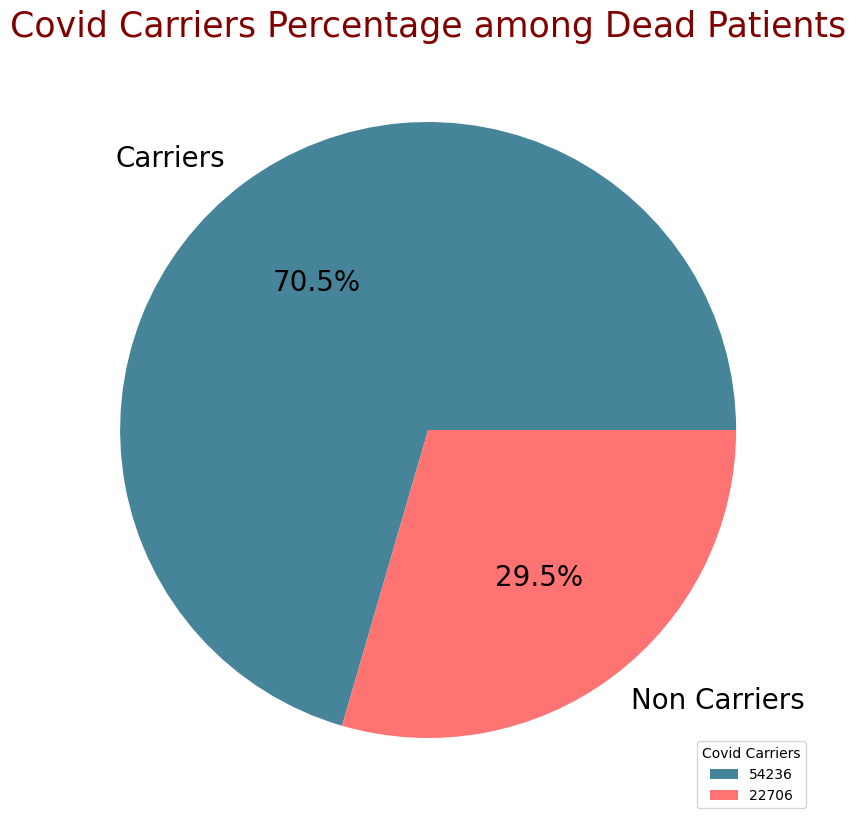

In [62]:
# Create a pie chart to display the percentage of Covid Carriers vs. Non Carriers among deceased patients in 'df_dead', with specific colors and labels.
labels = ['Carriers', 'Non Carriers']
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 25)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [63]:
# Count the frequency of each unique value in the 'Covid_or_Not' column of the 'df_dead' DataFrame, which indicates Covid carrier status among deceased patients.
df_dead["Covid_or_Not"].value_counts()

Patient is a Covid 19 Carrier        54236
Patient is not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

In [66]:
# Apply the 'Covid_or_Not' function to the 'CLASIFFICATION_FINAL' column of the 'df' DataFrame to create a new column indicating Covid-19 carrier status.
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

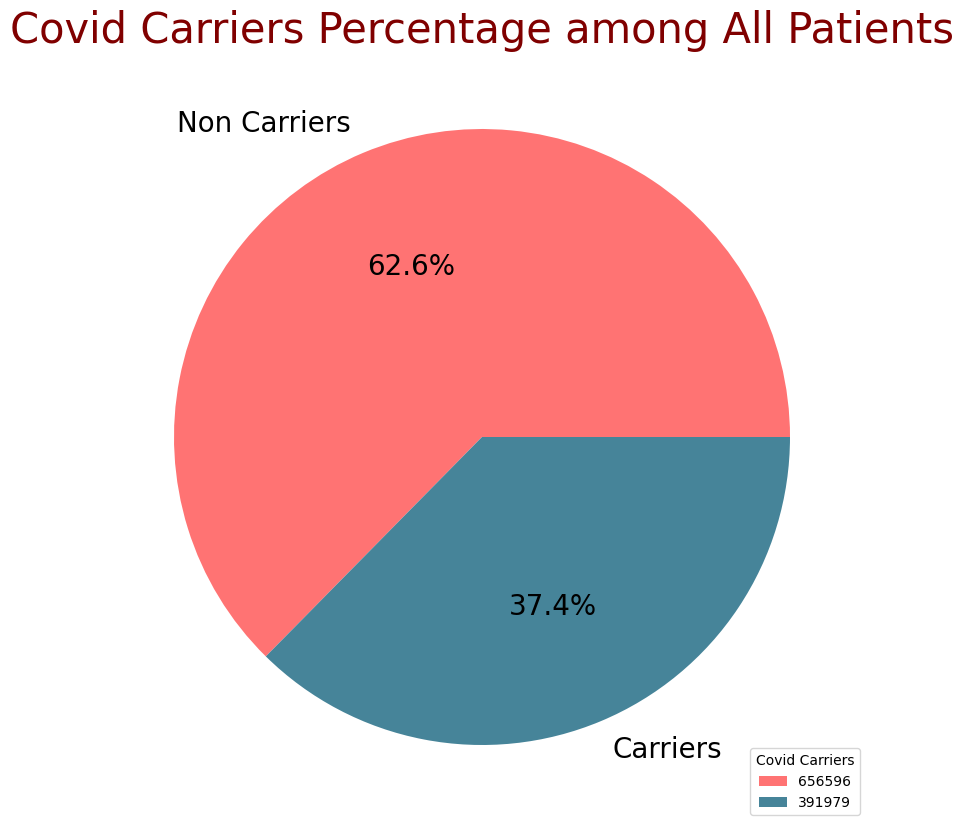

In [65]:
# Create a pie chart to display the percentage of Covid Carriers vs. Non Carriers among all patients in the 'df' DataFrame, with specific colors and labels.
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [67]:
# Count the frequency of each unique value in the 'Covid_or_Not' column of the 'df' DataFrame, which indicates Covid carrier status among all patients.
df["Covid_or_Not"].value_counts()

Patient is not a Covid 19 Carrier    656596
Patient is a Covid 19 Carrier        391979
Name: Covid_or_Not, dtype: int64

In [70]:
# Create a DataFrame 'Covid_deaths' containing records of patients who are Covid-19 carriers.
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [71]:
# Count the frequency of each unique value in the 'DEAD' column of the 'Covid_deaths' DataFrame, which indicates the mortality status of Covid-19 carriers.
Covid_deaths["DEAD"].value_counts()

Series([], Name: DEAD, dtype: int64)

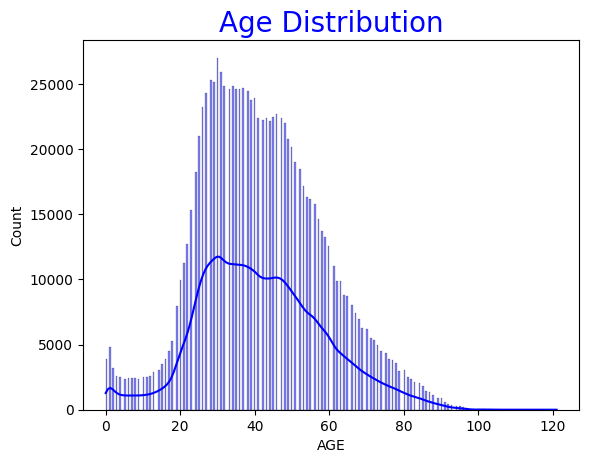

In [74]:
# Create a histogram to visualize the distribution of ages in the 'df' DataFrame, with a blue color scheme.
sns.histplot(x=df.AGE, kde = True, color = 'blue')
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

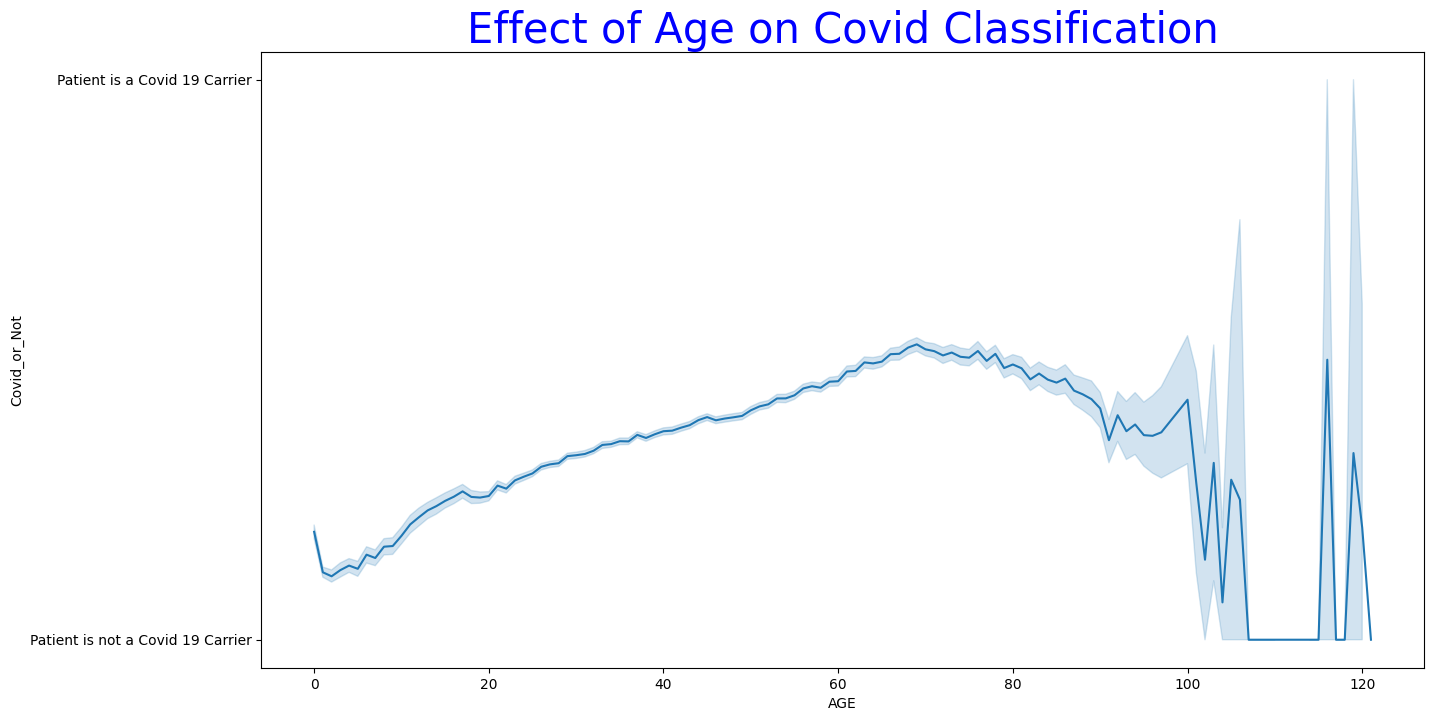

In [77]:
# Create a line plot to explore the relationship between age and Covid classification in the 'df' DataFrame, with a focus on how age affects Covid status.
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

In [78]:
# Create a copy of the DataFrame 'df' and store it as 'df_mod'.
df_mod = df.copy()

In [79]:
# Modify the 'OBESITY' column in the 'df_mod' DataFrame to categorize patients as 'Obese' if their value is 1, or 'Not Obese' otherwise.
df_mod['OBESITY'] = ['Obese' if i==1 else "Not Obese" for i in df.OBESITY]

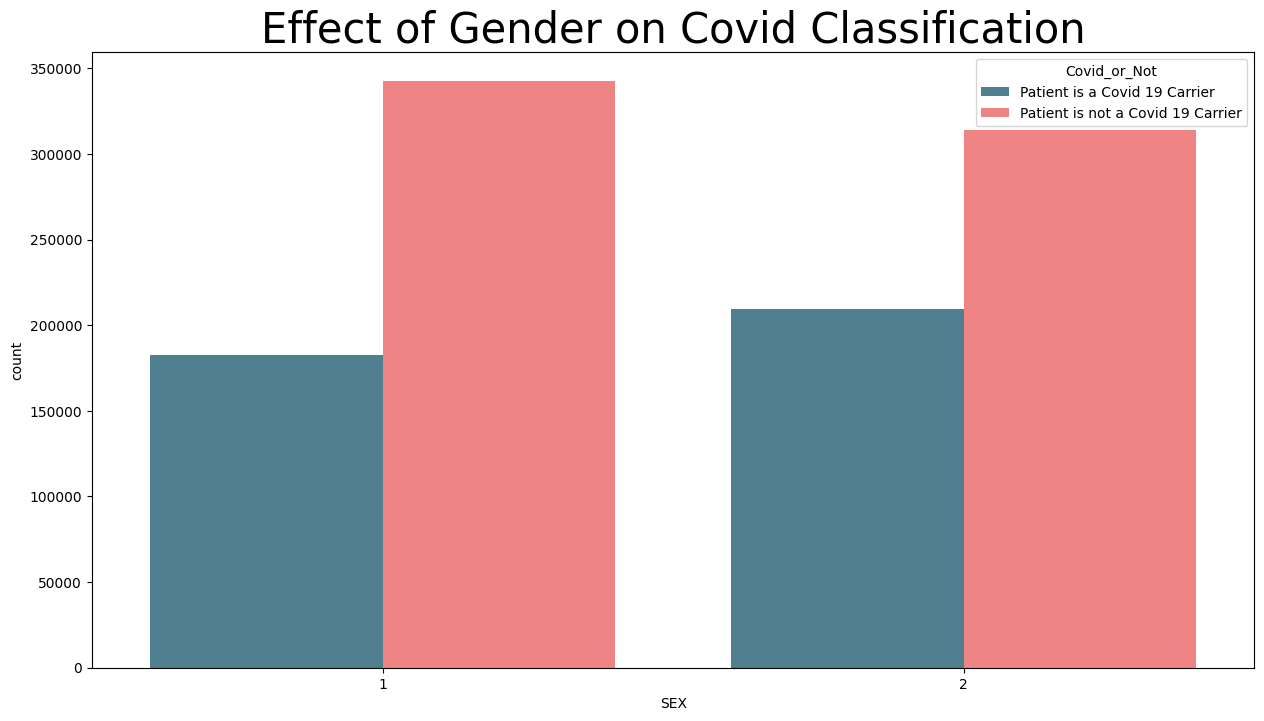

In [80]:
# Create a count plot to analyze the impact of gender on Covid classification in the 'df_mod' DataFrame, with custom colors.
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [81]:
# Create a DataFrame 'df_preg' containing male patients (SEX == 1) and then count the values in the 'PREGNANT' column to analyze pregnancy status among male patients.
df_preg = df[df['SEX'] == 1]
df_preg['PREGNANT'].value_counts()

2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64

In [82]:
# Modify the 'PREGNANT' column in the 'df_preg' DataFrame to categorize male patients as 'Pregnant' if their value is 1, or 'Non Pregnant' otherwise.
df_preg['PREGNANT'] = ['Pregnant' if i==1 else 'Non Pregnant' for i in df_preg.PREGNANT]

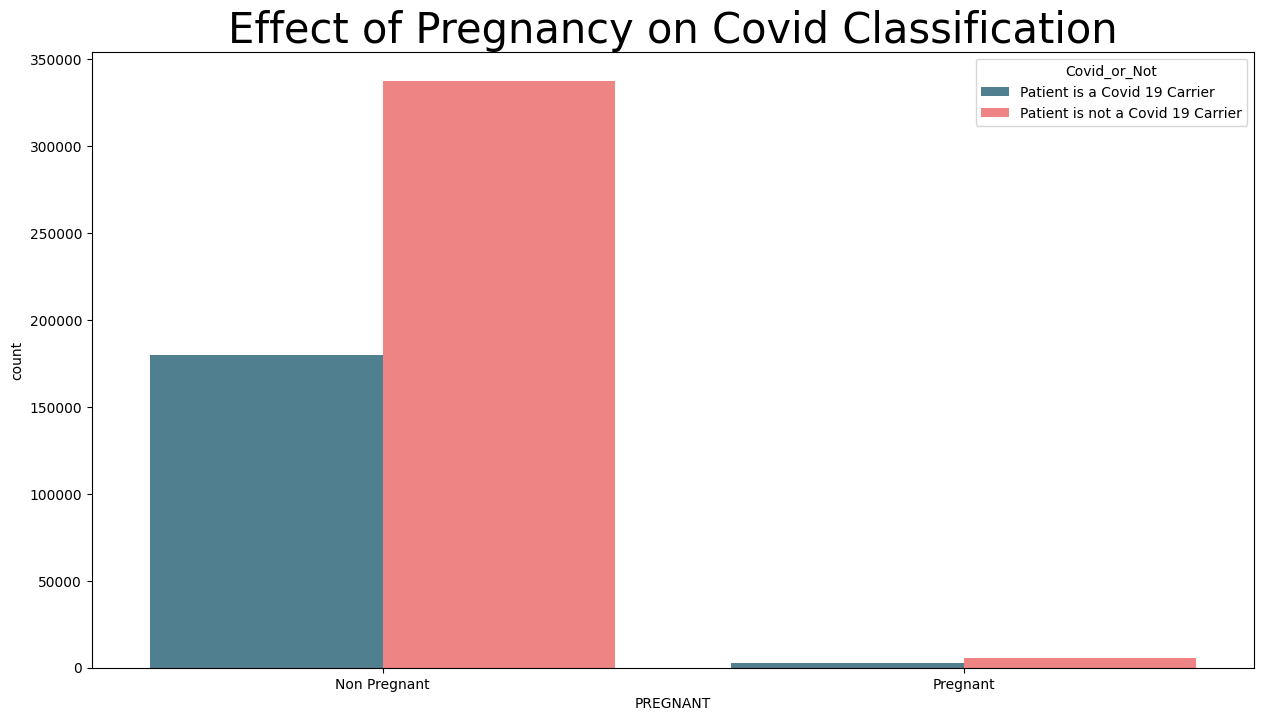

In [83]:
# Create a count plot to examine the influence of pregnancy on Covid classification among male patients in the 'df_preg' DataFrame, with custom colors.
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [84]:
# Count the frequency of Covid classifications among pregnant male patients in the 'df_preg' DataFrame.
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Patient is not a Covid 19 Carrier    5377
Patient is a Covid 19 Carrier        2754
Name: Covid_or_Not, dtype: int64

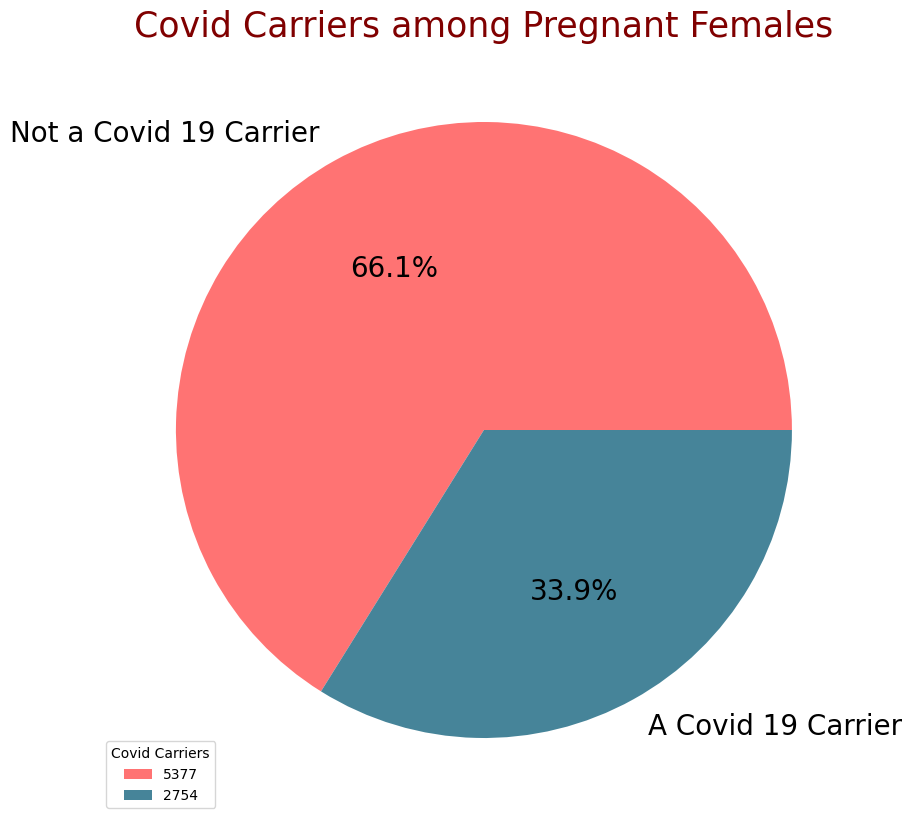

In [85]:
# Create a pie chart to display the percentage of Covid Carriers vs. Non Carriers among pregnant females in the 'df_preg' DataFrame, with specific colors and labels.
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [ ]:
# Count the frequency of Covid classifications among non-pregnant male patients in the 'df_preg' DataFrame.
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

In [ ]:
# Create a pie chart to display the percentage of Covid Carriers vs. Non Carriers among non-pregnant females in the 'df_preg' DataFrame, with specific colors and labels.
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [86]:
#print the df_med
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [87]:
# Create a new DataFrame 'df_diseases' by removing specific columns ('PREGNANT', 'OBESITY', 'DEAD') from the 'df_med' DataFrame.
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])

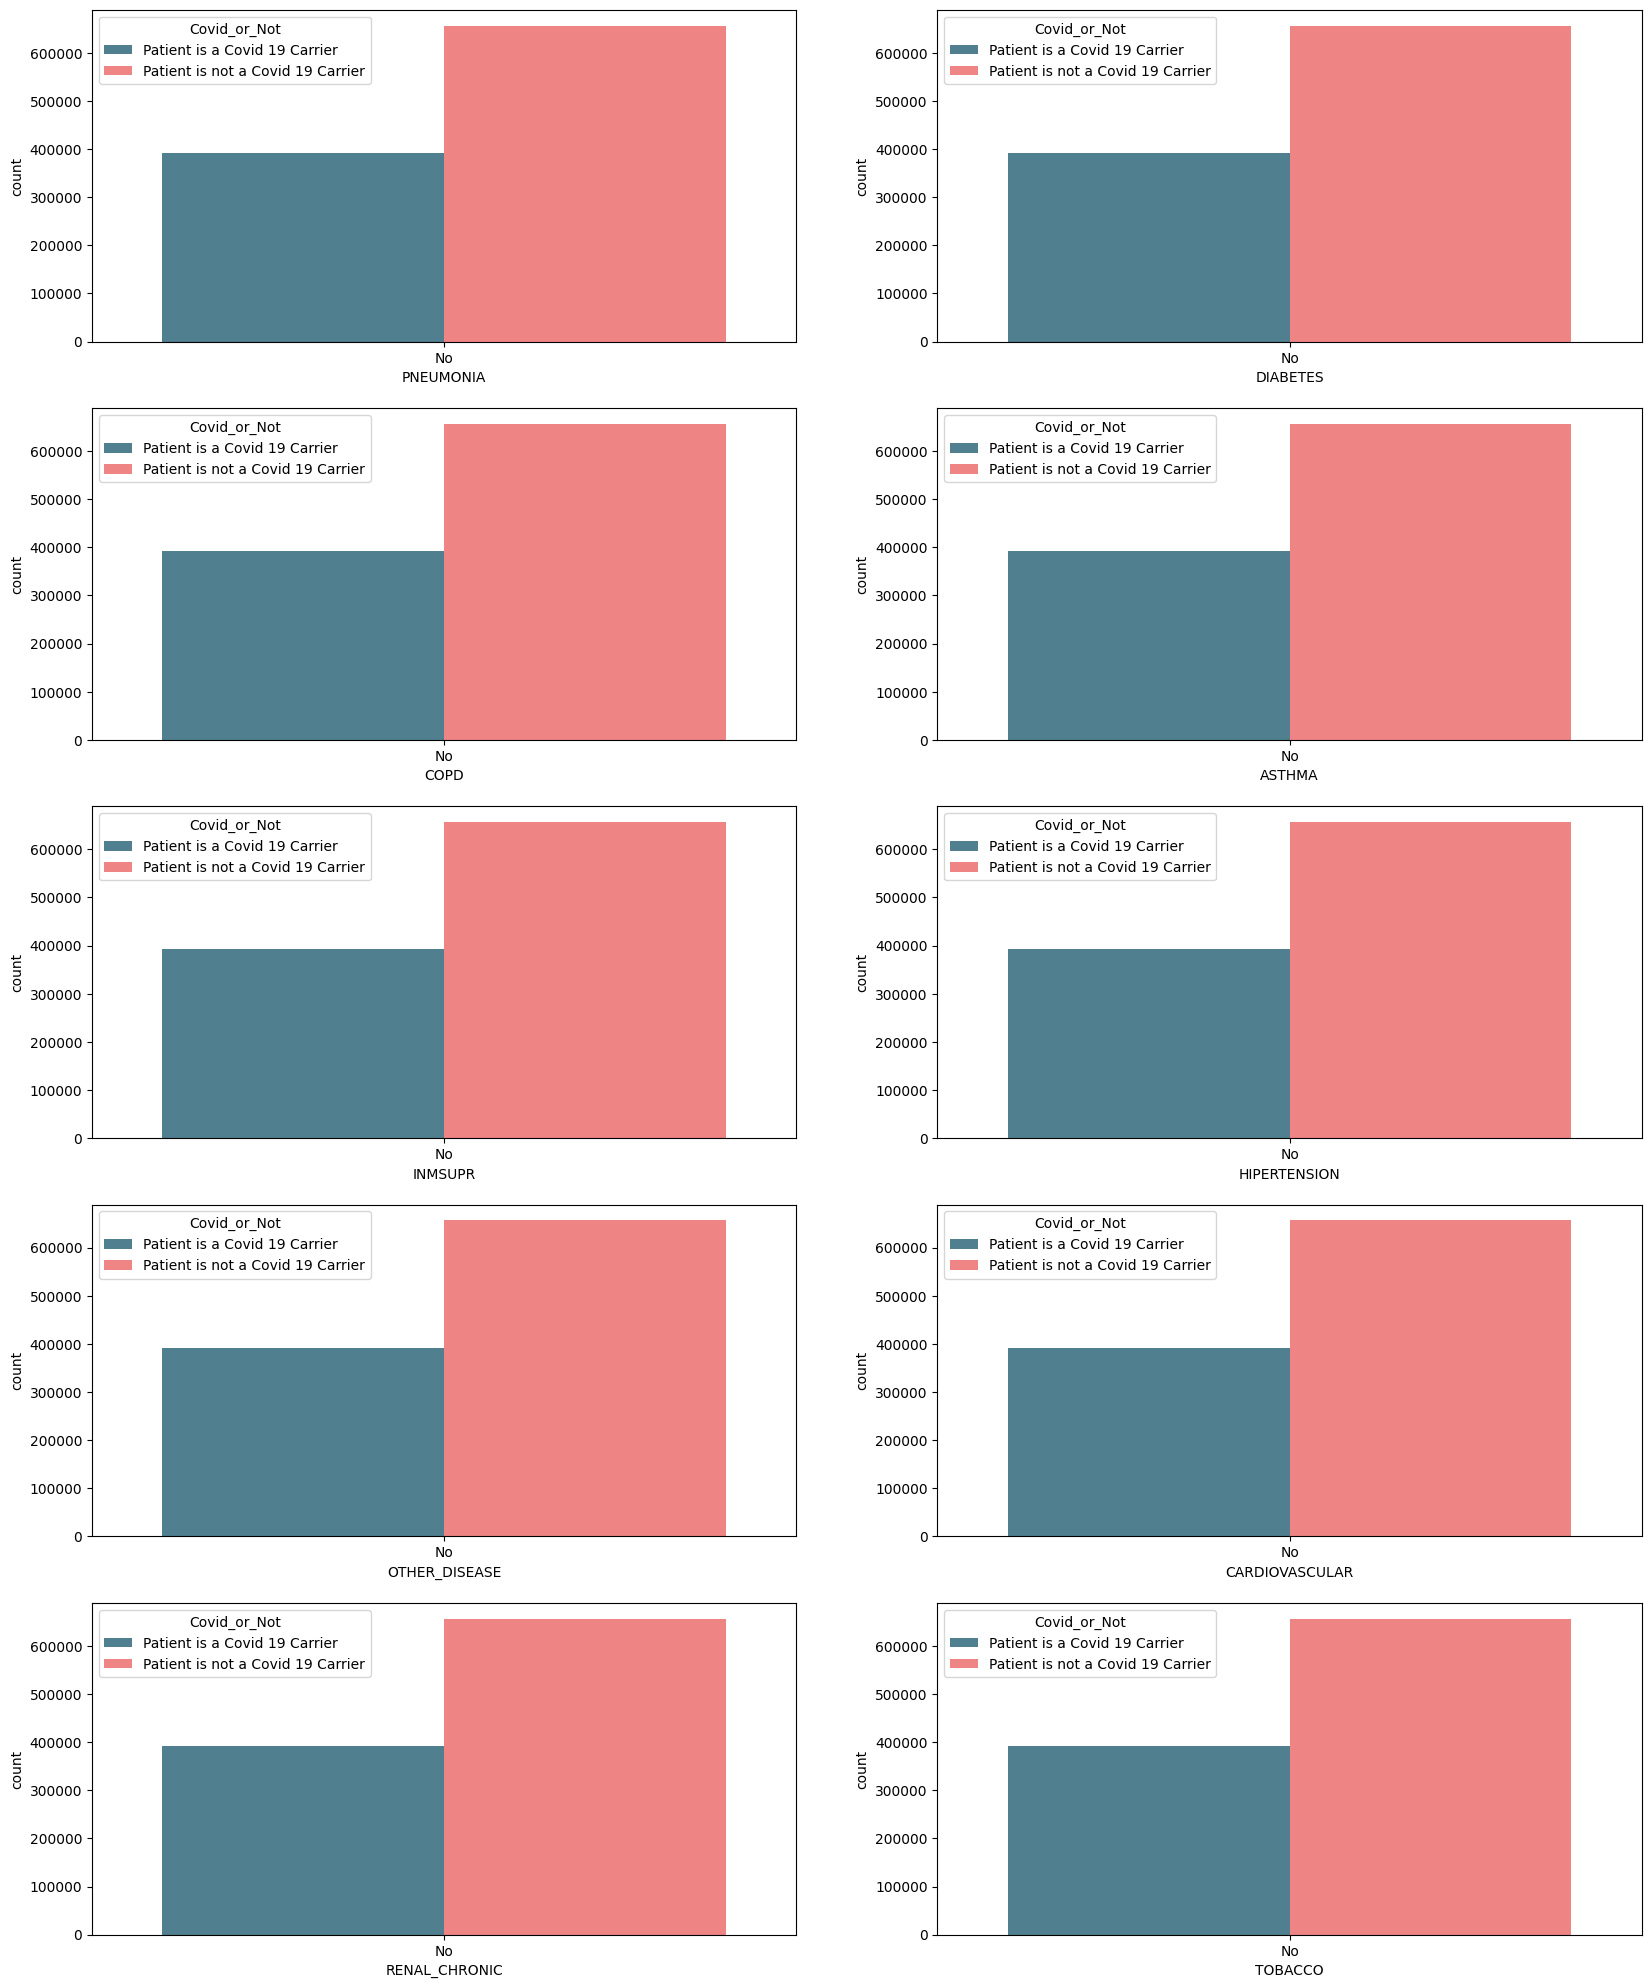

In [89]:
# Create multiple count plots to visualize the presence or absence of diseases among patients in the 'df_diseases' DataFrame, with Covid classification comparisons.
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

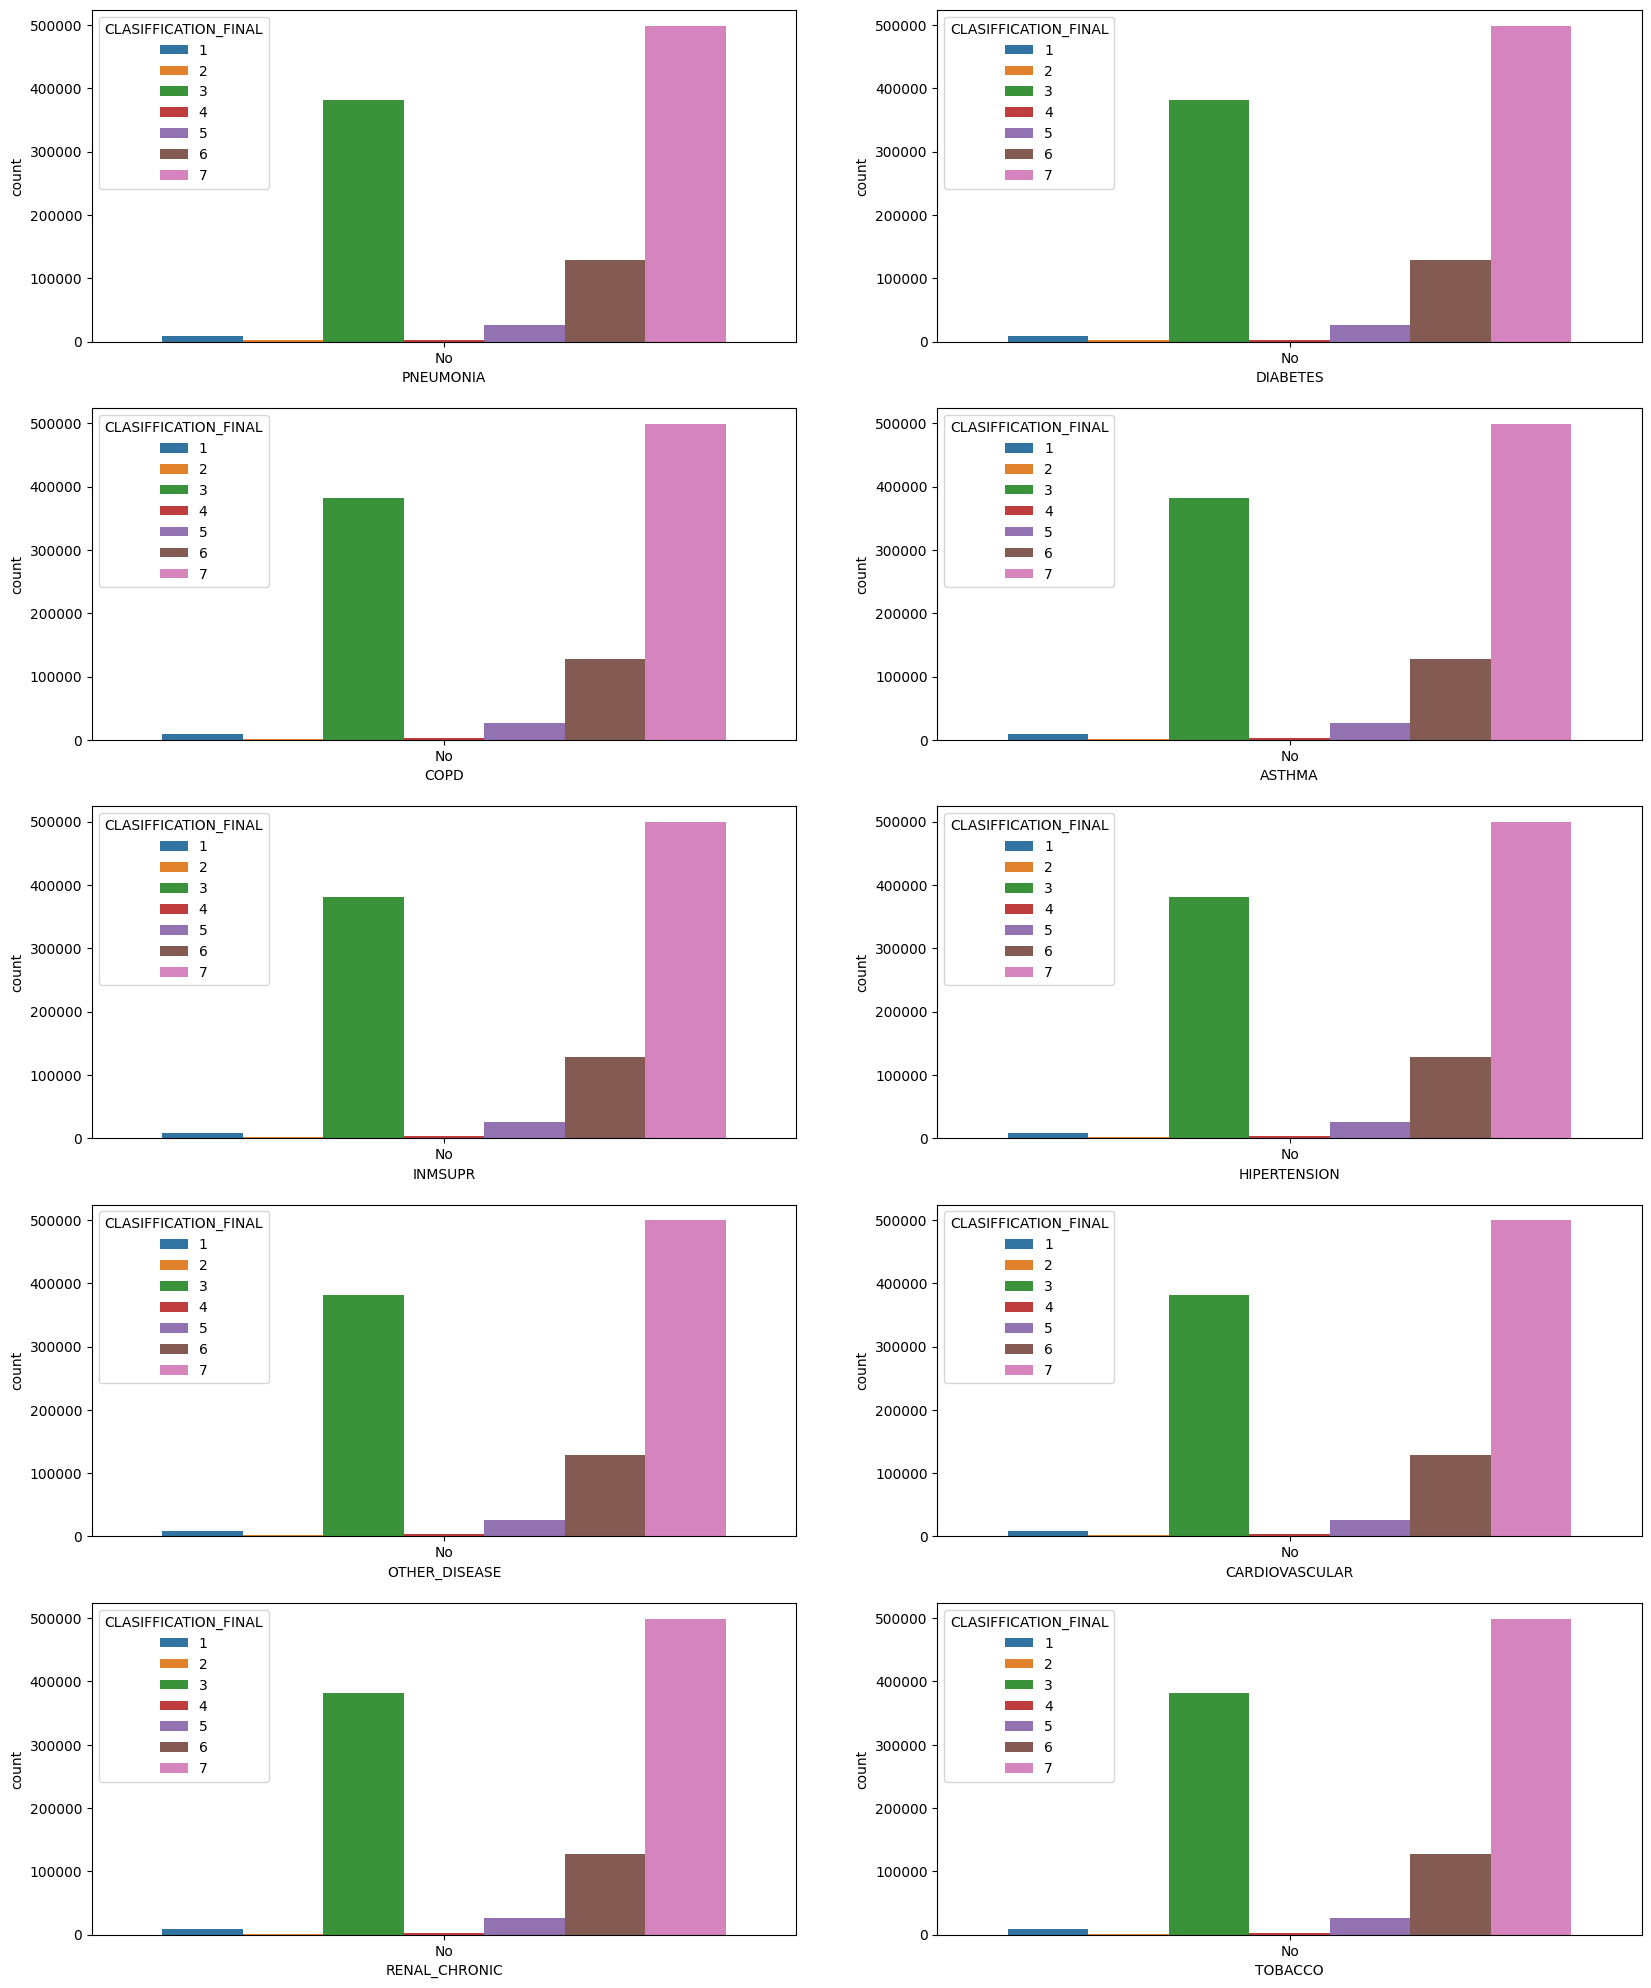

In [90]:
# Create multiple count plots to visualize the distribution of diseases among patients in the 'df_diseases' DataFrame, grouped by Covid classification.
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

In [94]:
#print the columns
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

In [92]:
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

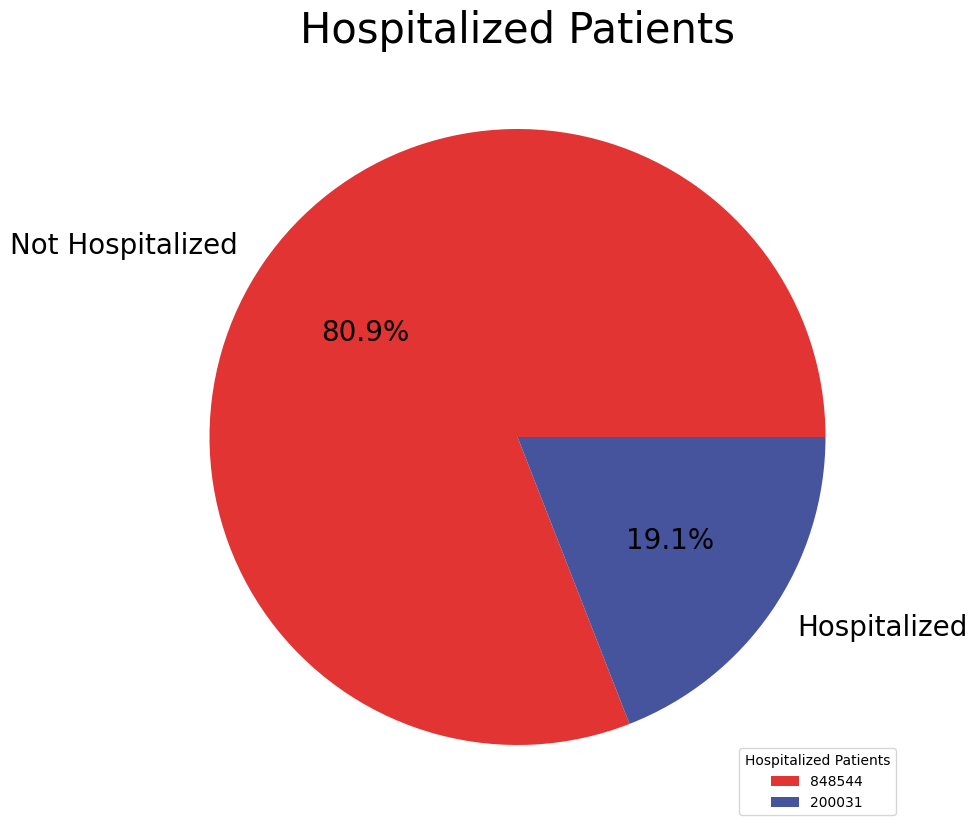

In [93]:
# Count the frequency of each unique value in the 'PATIENT_TYPE' column of the 'df' DataFrame.
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [95]:
# Create a DataFrame 'df_hosp' containing records of hospitalized patients (PATIENT_TYPE == 2) from the 'df' DataFrame.
df_hosp = df[df['PATIENT_TYPE']==2]

In [97]:
# Modify the 'DEAD' column in the 'df_hosp' DataFrame to categorize patients as 'Dead' if their value is 1, or 'Alive' if it's 0.
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, 'Dead')
df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, 'Alive')

In [98]:
# Count the frequency of 'Dead' and 'Alive' values in the 'DEAD' column of the 'df_hosp' DataFrame, which indicates the mortality status of hospitalized patients.
df_hosp['DEAD'].value_counts()

Alive    129965
Dead      70066
Name: DEAD, dtype: int64

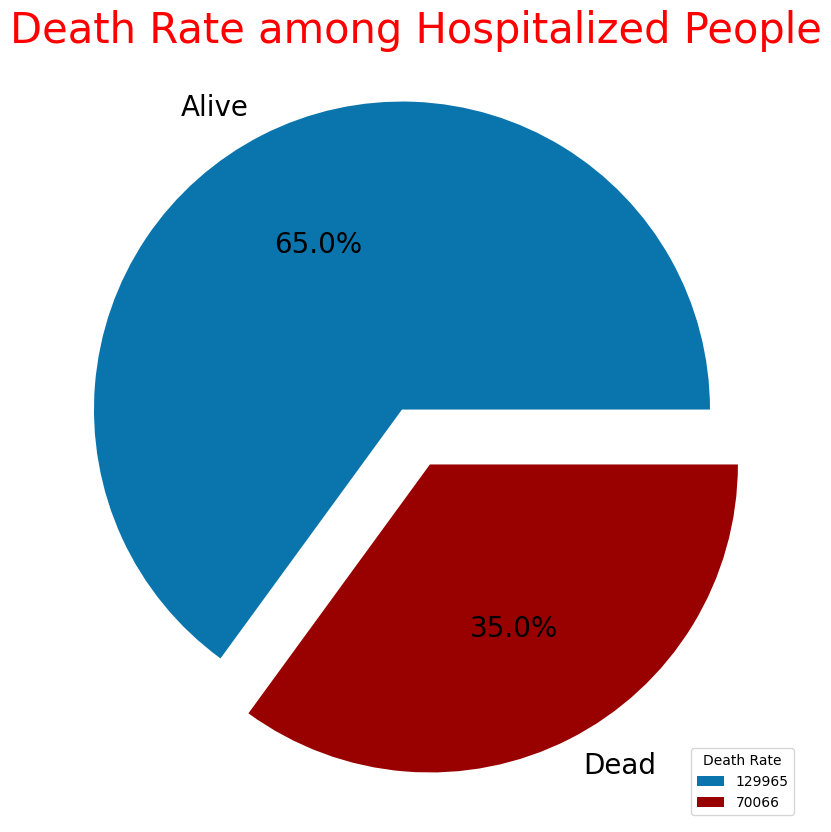

In [99]:
# Create a pie chart to display the death rate among hospitalized people in the 'df_hosp' DataFrame, with specific colors and labels.
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [100]:
# Display the shape (number of rows and columns) and the column names of the 'df_diseases' DataFrame.
print(df_diseases.shape)
print(df_diseases.columns)

(1048575, 10)
Index(['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')


In [101]:
# Display the shape (number of rows and columns) and the column names of the 'df_hosp' DataFrame, which contains hospitalization records.
print(df_hosp.shape)
print(df_hosp.columns)

(200031, 23)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')


In [102]:
# Create a new DataFrame 'df_diseases2' by removing specific columns from the 'df_hosp' DataFrame to focus on disease-related data.
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'PREGNANT', 'OBESITY', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD', 'Covid_or_Not'])

In [ ]:
# Create multiple count plots to visualize the presence or absence of diseases among hospitalized patients in the 'df_diseases2' DataFrame, with comparisons based on mortality status.
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

In [103]:
# Count the frequency of each unique value in the 'PATIENT_TYPE' column of the 'df_dead' DataFrame, which contains deceased patients.
df_dead.PATIENT_TYPE.value_counts()

2    70066
1     6876
Name: PATIENT_TYPE, dtype: int64

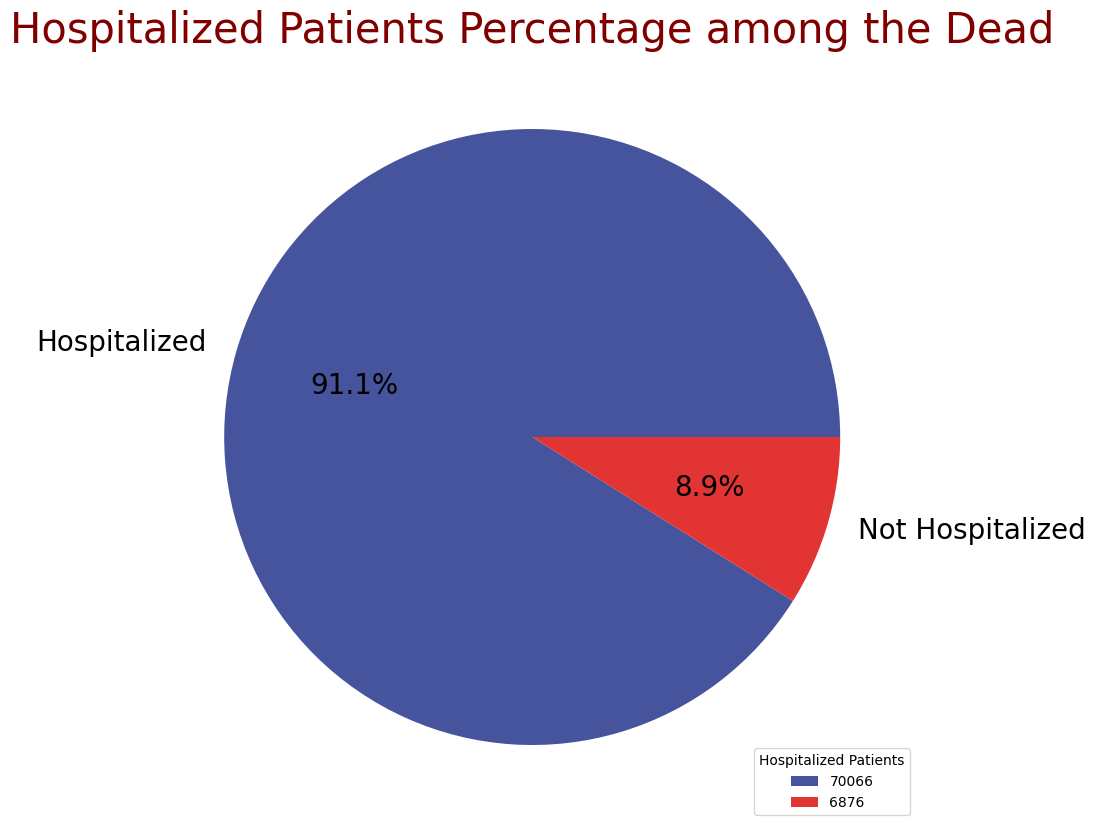

In [104]:
# Create a pie chart to display the percentage of hospitalized and non-hospitalized patients among the deceased in the 'df_dead' DataFrame, with specific colors and labels.
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [105]:
# Select records from the DataFrame 'df' where patients are both hospitalized (PATIENT_TYPE == 2) and admitted to the ICU (ICU == 1).
df[(df['PATIENT_TYPE'] == 2) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,Patient is a Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
56,2,1,1,2,NaT,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
57,2,1,1,2,NaT,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,NaT,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048270,2,13,1,2,NaT,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048358,1,13,1,2,NaT,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048364,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Patient is not a Covid 19 Carrier


In [106]:
# Count the frequency of each unique value in the 'ICU' column of the 'df' DataFrame, which indicates whether patients were admitted to the Intensive Care Unit (ICU).
df.ICU.value_counts()

2.0    1024229
1.0      16858
Name: ICU, dtype: int64

In [107]:
# Count the frequency of ICU admissions among hospitalized patients (PATIENT_TYPE == 2) in the 'df' DataFrame.
df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

2.0    175685
1.0     16858
Name: ICU, dtype: int64

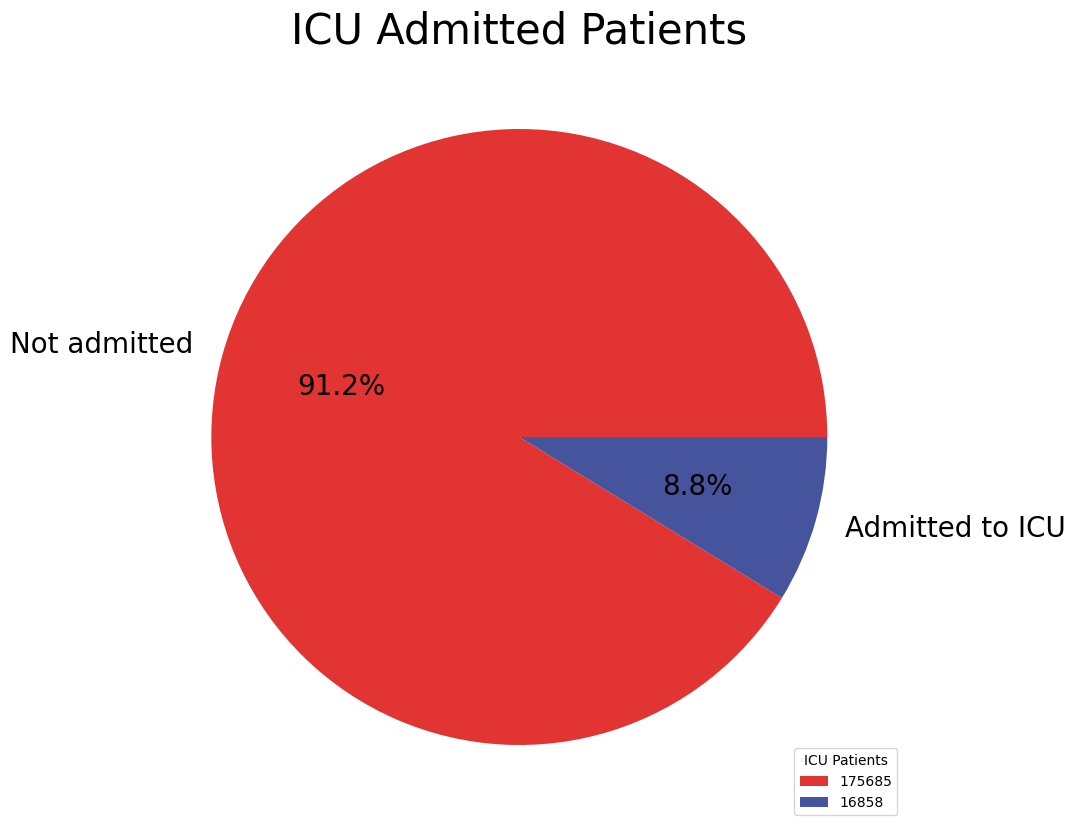

In [108]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

In [109]:
# Select records from the DataFrame 'df' where patients have a 'CLASIFFICATION_FINAL' value less than 4 and were admitted to the ICU (ICU == 1).
df[(df['CLASIFFICATION_FINAL'] < 4) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,Patient is a Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
340,1,3,2,2,2020-06-04,1.0,1.0,90.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,Patient is a Covid 19 Carrier
341,1,3,2,2,2020-07-04,1.0,1.0,61.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,1.0,1,Patient is a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047735,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
1047737,1,13,2,2,NaT,2.0,2.0,56.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
1047740,1,13,2,2,NaT,2.0,1.0,68.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
1047750,1,13,2,2,NaT,1.0,2.0,35.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier


In [110]:
#Patients who were hospitalized in an Intensive Care Unit (ICU) for reasons other than Covid-19, possibly due to different health conditions or diseases
16858 - 10449

6409

In [111]:
# Count the frequency of 'CLASIFFICATION_FINAL' values among patients who were admitted to the ICU (ICU == 1) in the 'df' DataFrame.
df[(df['ICU'] == 1)]['CLASIFFICATION_FINAL'].value_counts()

3    10097
7     4951
6      953
5      465
1      255
2       97
4       40
Name: CLASIFFICATION_FINAL, dtype: int64

In [112]:
# Count the frequency of Covid classifications among patients who were admitted to the ICU (ICU == 1) in the 'df' DataFrame.
df[(df['ICU'] == 1)]['Covid_or_Not'].value_counts()

Patient is a Covid 19 Carrier        10449
Patient is not a Covid 19 Carrier     6409
Name: Covid_or_Not, dtype: int64

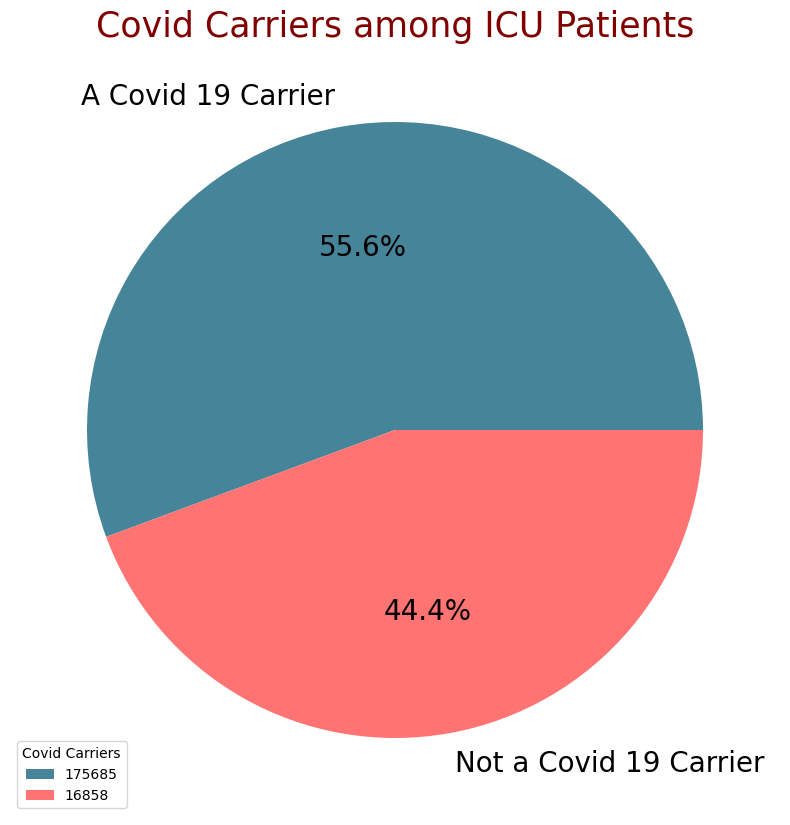

In [113]:
# Create a pie chart to visualize the percentage of Covid Carriers and Non Carriers among ICU-admitted patients (PATIENT_TYPE == 2) in the 'df' DataFrame, with specific colors and labels.
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

In [114]:
df[(df['ICU'] == 1)]['DEAD'].value_counts()

0    8663
1    8195
Name: DEAD, dtype: int64

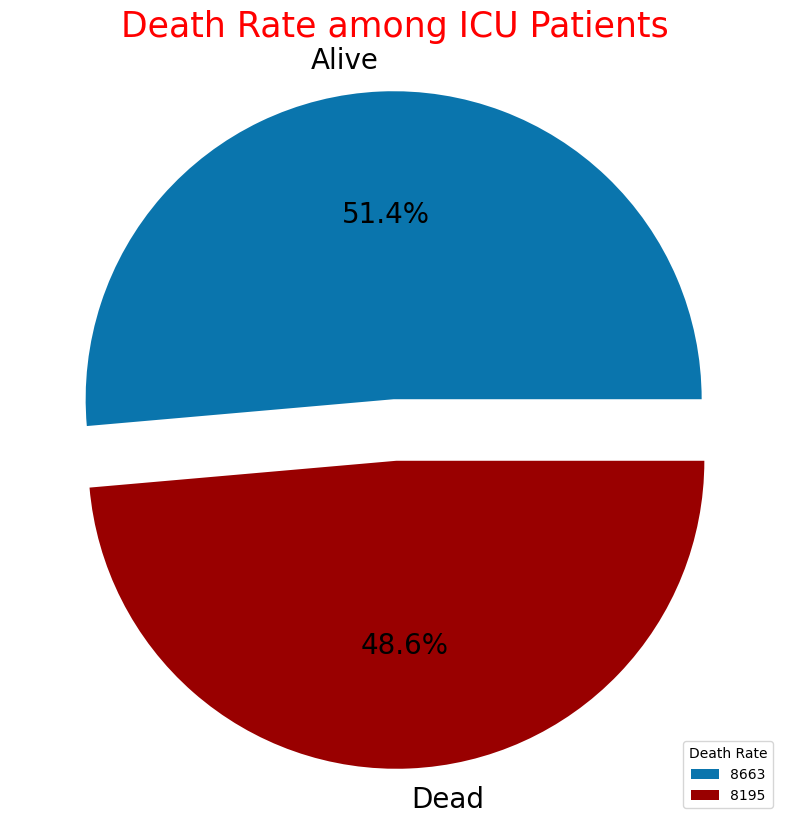

In [115]:
# Count the frequency of mortality status ('DEAD') among patients who were admitted to the ICU (ICU == 1) in the 'df' DataFrame.
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [116]:
#print the columns
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

Text(0.5, 1.0, 'Death Trend through Time')

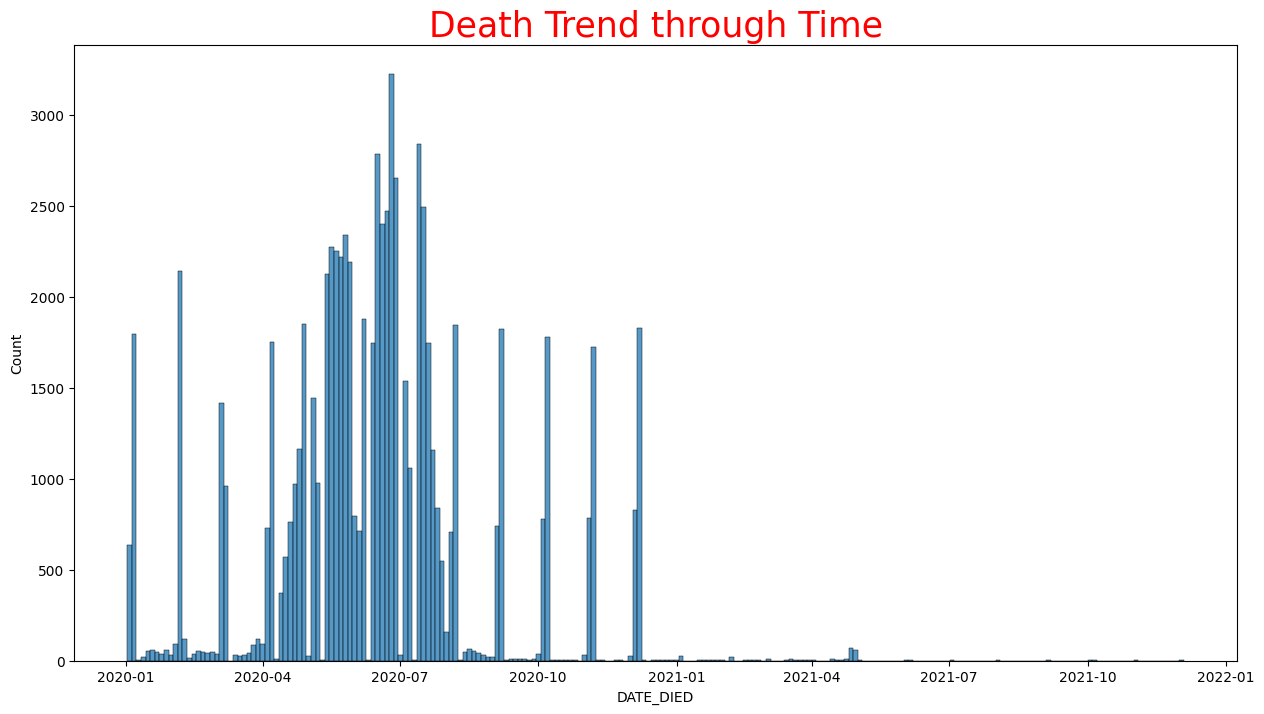

In [117]:
# Create a histogram to visualize the trend of deaths over time based on the 'DATE_DIED' column in the 'df' DataFrame.
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='DATE_DIED')
plt.title('Death Trend through Time', color = 'red', fontsize = 25)